Cell 1 – Import Libraries

Explanation:
I imported required Python libraries to read data, visualize it, and build machine learning models.

In [62]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Cell 2 – Load Dataset

Explanation:
I loaded the customer churn dataset into Python so i can analyze and work with it.

In [63]:
df=pd.read_csv("Telco_Cusomer_Churn.csv")

In [64]:
df.head()

,customerID,gender,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,1,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,34,One year,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,2,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,45,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,2,Month-to-month,Electronic check,70.70,151.65,Yes


Cell 3 – Check Dataset Shape

Explanation:
This shows how many rows and columns are present in the dataset.

In [65]:
df.shape

(7043, 8)

cell 4-Dataset Information

Explanation:
This helps me to  understand column names, data types, and whether any values are missing.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerID      7043 non-null   object 
 1   gender          7043 non-null   object 
 2   tenure          7043 non-null   int64  
 3   Contract        7043 non-null   object 
 4   PaymentMethod   7043 non-null   object 
 5   MonthlyCharges  7043 non-null   float64
 6   TotalCharges    7043 non-null   object 
 7   Churn           7043 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 440.3+ KB


Cell 6 – Convert TotalCharges to Numeric

Explanation:
I converted the TotalCharges column to numbers because machine learning models cannot work with text.

In [67]:
df.isnull().sum()

customerID        0
gender            0
tenure            0
Contract          0
PaymentMethod     0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64

Cell 7 – Fill Missing Values

Explanation:
I replaced missing values with the median so the dataset becomes complete.

In [68]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median())


0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

Cell 8 – Drop customerID Column

Explanation:
I removed customerID because it is only an identifier and does not help in predicting churn.

In [69]:
df.drop(['customerID'],axis='columns',inplace=True)

Cell 9 – Encode Categorical Columns

Explanation:
I converted text data like gender, contract type, and payment method into numbers.

In [70]:
le=LabelEncoder()
categorical_cols=['gender','Contract','PaymentMethod','Churn']
for col in categorical_cols:
    df[col]=le.fit_transform(df[col])

Cell 10 – Churn Distribution Plot

Explanation:
This graph shows how many customers stayed and how many customers left.

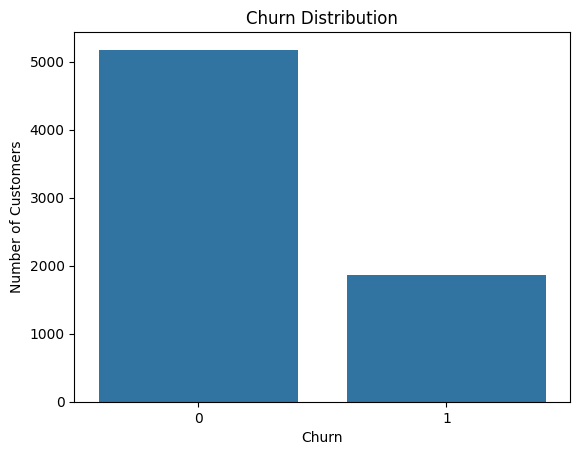

In [71]:
sns.countplot(x='Churn',data=df)
plt.title('Churn Distribution')
plt.ylabel("Number of Customers")
plt.show()

Cell 11 – Contract vs Churn

Explanation:
This plot shows how different contract types affect customer churn.

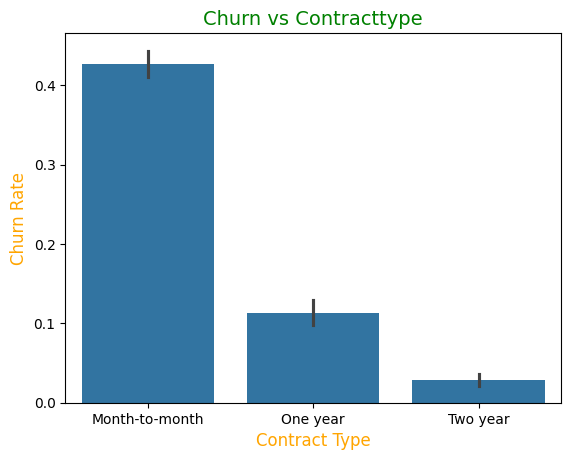

In [72]:
sns.barplot(x="Contract",y="Churn",data=df)
plt.title("Churn vs Contracttype",color="green",fontsize=14)
plt.ylabel("Churn Rate",color="Orange",fontsize=12)
plt.xlabel("Contract Type",color="Orange",fontsize=12,)
plt.xticks([0,1,2],['Month-to-month','One year','Two year'])
plt.show()

Cell 12 – Tenure vs Churn

Explanation:
This helps me to understand whether new or old customers are more likely to churn.

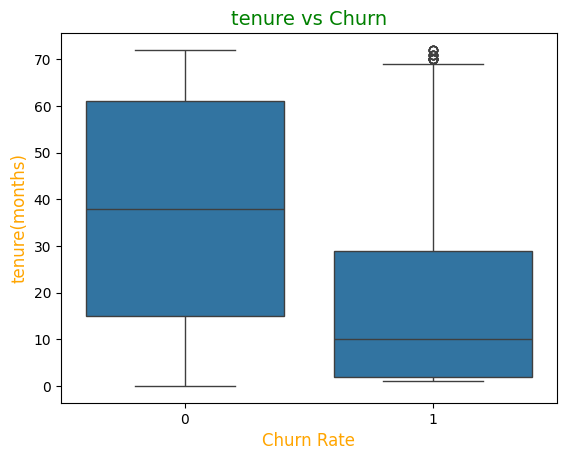

In [73]:
sns.boxplot(x="Churn",y="tenure",data=df)
plt.title("tenure vs Churn",color="green",fontsize=14)
plt.ylabel("tenure(months)",color="Orange",fontsize=12)
plt.xlabel("Churn Rate",color="Orange",fontsize=12,)
plt.show()

Cell 13 – Correlation Heatmap

Explanation:
This shows how numerical features are related to churn and to each other.

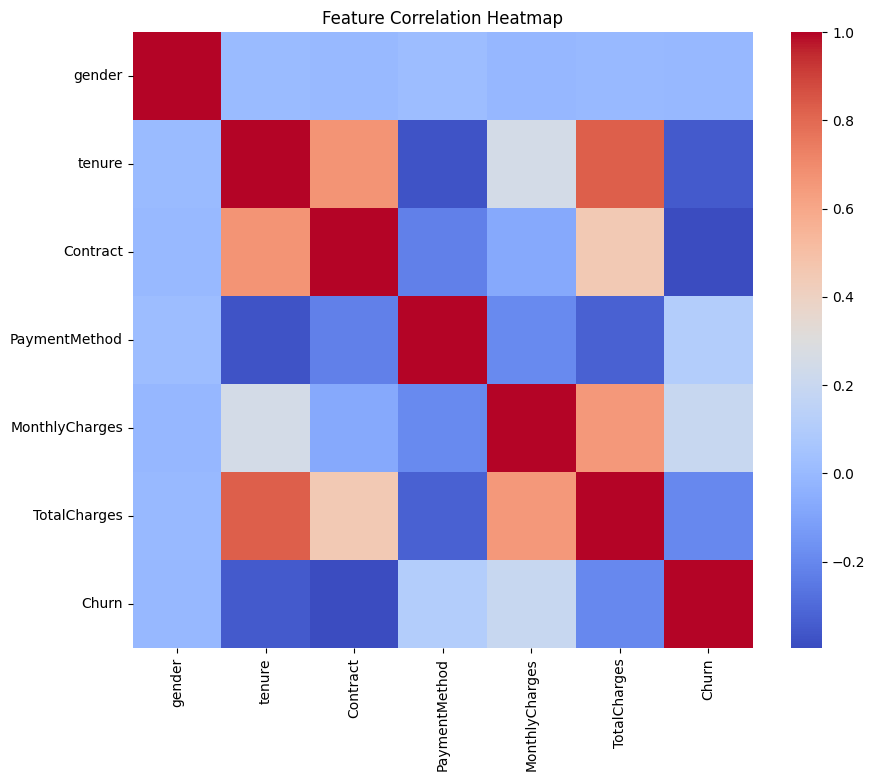

In [74]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

Cell 14 – Feature Engineering

Explanation:
I created a new useful feature to help the model understand customer spending behavior.

In [75]:
df['AvgMonthlySpend']=df['TotalCharges']/(df['tenure']+1)
df=df.dropna()

Cell 15 – Separate Features and Target

Explanation:
I separated input data (features) and output data (churn) for machine learning.

In [76]:
X = df.drop('Churn', axis=1)
y = df['Churn']


Cell 16 – Train-Test Split

Explanation:
I splited the data into training and testing parts to evaluate the model correctly.

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Cell 18 – Train Logistic Regression Model

Explanation:
I trained a logistic regression model to predict whether a customer will churn.

In [78]:
model=LogisticRegression(max_iter=1000   )
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Cell 19 – Model Evaluation

Explanation:
We check how well the model predicts churn using accuracy and other metrics.

In [82]:
y_pred = model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7853589196872779

Confusion Matrix:
 [[928 105]
 [197 177]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.77      1407



Cell 21 – Random Forest Model

Explanation:
We train a random forest model to compare its performance with logistic regression.

In [80]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Cell 22 – Random Forest Evaluation

Explanation:
We evaluate the random forest model to see if it performs better.

In [ ]:
rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.7611940298507462

Confusion Matrix:
 [[905 128]
 [208 166]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84      1033
           1       0.56      0.44      0.50       374

    accuracy                           0.76      1407
   macro avg       0.69      0.66      0.67      1407
weighted avg       0.75      0.76      0.75      1407



Conclusion:
    “I built a churn prediction model, analyzed customer behavior, and gave business insights to reduce churn.”